In [157]:
# -----------------------------------------
# Data Processing Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# -----------------------------------------
# Machine Learning Models
# -----------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb

# -----------------------------------------
# Resampling Techniques for Imbalanced Data
# -----------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# -----------------------------------------
# Hyperparameter Tuning
# -----------------------------------------
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# -----------------------------------------
# Evaluation Metrics
# -----------------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    cohen_kappa_score,
    classification_report,
    roc_auc_score
)

# -----------------------------------------
# Visualization Tools
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image

# -----------------------------------------
# Utilities
# -----------------------------------------
from collections import Counter
import collections


#### Import preprocessed data without missing values, removed outliers

In [158]:

train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')



In [159]:
# Define the target variable (e.g., 'target') and features (all other columns)
X_train = train.drop('readmitted', axis=1)  # Drop the target column for features
y_train = train['readmitted']  # Select the target column

X_test = test.drop('readmitted', axis=1)  # Same for test set
y_test = test['readmitted']
X_train.shape

(80192, 113)

#### Standard Decision Tree (Baseline model)

In [154]:
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(
    max_depth=10,              # Limit tree depth to avoid overfitting
    min_samples_split=10,      # Require at least 10 samples to split a node
    min_samples_leaf=5,        # Require at least 5 samples per leaf
    criterion='gini',          # Use Gini impurity for splitting
    class_weight='balanced',   # Handle class imbalance
    random_state=42            # Fix randomness for reproducibility
)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
acc_dt = accuracy_score(y_test, y_pred)
print("Standard Decision Tree - Test Accuracy:", round(acc_dt, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred)))

Standard Decision Tree - Test Accuracy: 0.66
Accuracy is 0.66
Precision is 0.17
Recall is 0.55
F1 score is 0.26


#### Standard Bagging classifier



In [155]:

# Create a bagging classifier 
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10,class_weight='balanced'),  # Example base estimator with a max depth of 5
    n_estimators=50,  # Number of base estimators (trees)
    max_samples=0.8,  # Fraction of samples to use for each base estimator
    max_features=0.8,  # Fraction of features to use for each base estimator
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
      # Ensuring reproducibility
)

# Train the bagging classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
acc_bag = accuracy_score(y_test, y_pred)
print("Bagging Classifier - Test Accuracy:", round(acc_bag, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred)))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator BaggingClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. This 

Bagging Classifier - Test Accuracy: 0.7
Accuracy is 0.70
Precision is 0.19
Recall is 0.53
F1 score is 0.28


#### Balanced Bagging Classifier

In [156]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),  
    n_estimators=50,  # Number of base estimators (trees)
    sampling_strategy='auto',  # Automatically balance the class distribution
    replacement=True,  # Sample with replacement for better variance
    max_samples=0.8,
    max_features=0.8,
    n_jobs=-1,
    random_state=42  # Ensuring reproducibility
)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred)))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. 

Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 428, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/_parallel_backends.py", line 620, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anacon

#### Standard Random Forest Classifier with Class weighting

In [ ]:
# Create a Random Forest Classifier with Class Weighting
rf_cw = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum tree depth
    min_samples_split=5,       # Minimum samples to split
    min_samples_leaf=2,        # Minimum samples per leaf
    max_features='sqrt',       # Features to consider at each split
    class_weight='balanced',   # Handle class imbalance
    bootstrap=True,            # Use bootstrap sampling
    oob_score=True,            # Use out-of-bag samples for validation
    n_jobs=-1,                 # Use all CPU cores
    random_state=42            # For reproducibility
)


# Train the Random Forest classifier on the training data
rf_cw.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cw = rf_cw.predict(X_test)

# Calculate the accuracy of the model
acc_cw = accuracy_score(y_test, y_pred_cw)
print("Random Forest with Class Weighting Accuracy:",round(acc_cw, 2))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_cw)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_cw)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred_cw)))


Random Forest with Class Weighting Accuracy: 0.68
Precision is 0.19
Recall is 0.57
F1 score is 0.28


#### Evaluation of Random forest with class weighting

Only 17% of the patients flagged as high risk for readmission were actually readmitted. This suggests the model generates a high number of false positives.
Recall (0.60):

The model successfully identifies 60% of the actual readmissions, which is decent. However, missing the remaining 40% (false negatives) could still have serious implications.


In [ ]:
# Evaluate the model

# Calculate and print the accuracy
acc_rus = accuracy_score(y_test, y_pred_cw)
print("Random Forest with Random Undersampling Accuracy: {:.2f}".format(acc_cw))

# Calculate precision, recall, and F1-score for binary classification (assuming labels 0 and 1)
precision = precision_score(y_test, y_pred_cw)
recall = recall_score(y_test, y_pred_cw)
f1 = f1_score(y_test, y_pred_cw)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Print the classification report for detailed metrics across all classes
report = classification_report(y_test, y_pred_cw)
print("\nClassification Report:\n", report)



Random Forest with Random Undersampling Accuracy: 0.68
Precision: 0.19
Recall: 0.57
F1 Score: 0.28

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     17836
           1       0.19      0.57      0.28      2213

    accuracy                           0.68     20049
   macro avg       0.56      0.63      0.54     20049
weighted avg       0.85      0.68      0.73     20049



Confusion Matrix:
 [[12298  5538]
 [  950  1263]]


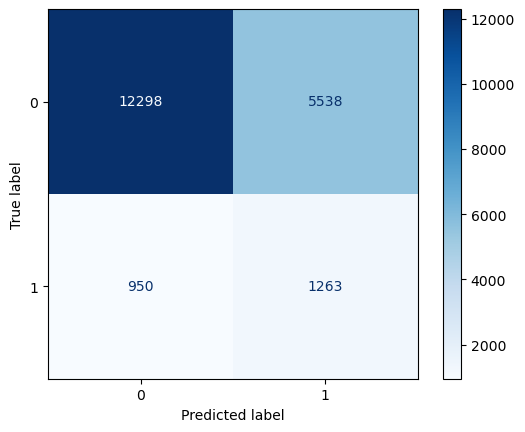

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_cw)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cw.classes_)
disp.plot(cmap='Blues')

#### XGBoost Classifier with SMOTE + ENN oversampler

First, scale continious numerical values 

In [ ]:

# # Identify the binary and continuous columns

# # List of continuous columns that you want to scale
# continuous_columns = ['age', 'time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient_log',
#        'number_emergency_log', 'number_inpatient_log']

# # Separate the continuous features
# X_train_continuous = X_train[continuous_columns]
# X_test_continuous = X_test[continuous_columns]

# # Apply StandardScaler to the continuous features
# scaler = StandardScaler()
# X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
# X_test_continuous_scaled = scaler.fit_transform(X_test_continuous)


# # Convert the scaled features back to a DataFrame
# X_train_continuous_scaled = pd.DataFrame(X_train_continuous_scaled, columns=continuous_columns)
# X_test_continuous_scaled = pd.DataFrame(X_test_continuous_scaled, columns=continuous_columns)

# # Concatenate the scaled continuous columns with the rest of the data
# X_train_scaled = pd.concat([X_train.drop(continuous_columns, axis=1), X_train_continuous_scaled], axis=1)
# X_test_scaled = pd.concat([X_test.drop(continuous_columns, axis=1), X_test_continuous_scaled], axis=1)



##### Apply SMOTEENN to training data

In [160]:

counter = collections.Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE + ENN
smote = SMOTEENN()
X_train_smenn, y_train_smenn = smote.fit_resample (X_train, y_train)
counter = collections.Counter (y_train_smenn)
print('After', counter)


Before Counter({0: 71155, 1: 9037})
After Counter({1: 70935, 0: 25349})


##### XGBoost classifier

Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.42
Kappa Score: 0.05
F1 Score: 0.23
Recall: 0.79
Precision: 0.14


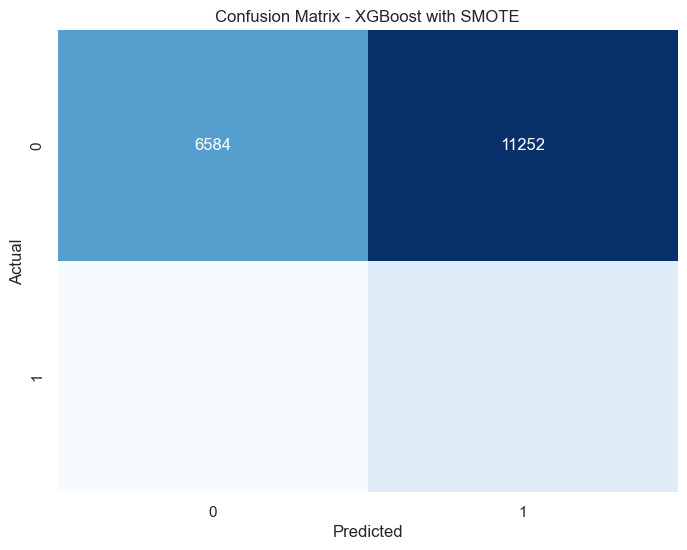

In [ ]:

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    max_depth=10,              # Maximum tree depth
    learning_rate=0.05,        # Learning rate
    subsample=0.8,             # Fraction of training samples per tree
    colsample_bytree=0.8,      # Fraction of features per tree
    colsample_bylevel=0.8,     # Fraction of features per level
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1,              # L2 regularization
    scale_pos_weight=1,        # Adjust for class imbalance (set based on data)
    n_jobs=-1,                 # Use all CPU cores
    random_state=42            # For reproducibility
)
xgb_classifier.fit(
    X_train_smenn, 
    y_train_smenn                  # Print training progress
)

# Make predictions using the model
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Bayesian Optimization 

4.3.1 Initialize domain space for range of values

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.5, 1),  # Added colsample_bylevel
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),  # Added learning_rate
    'n_estimators': 180,
    'seed': 0
}

4.3.2 Define objective function

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], early_stopping_rounds=10,max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),reg_lambda=space['reg_lambda'],min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),colsample_bylevel=space['colsample_bylevel'],learning_rate=space['learning_rate'],eval_metric='auc')
    
    evaluation = [( X_train_smenn, y_train_smenn), ( X_test, y_test)]
    
    clf.fit(X_train_smenn, y_train_smenn,
            eval_set=evaluation, 
            verbose=False)
    
    from sklearn.model_selection import cross_val_score

    # Using F1-score
    cv_scores = cross_val_score(clf, X_train_smenn, y_train_smenn, cv=5, scoring='f1')
            
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


Optimization algorithm

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.11037957005336925                                    
SCORE:                                                                             
0.11037957005336925                                                                
SCORE:                                                                             
0.11521771659434386                                                                
SCORE:                                                                             
0.11127737044241608                                                                
SCORE:                                                                             
0.11037957005336925                                                                
SCORE:                                                                             
0.11037957005336925                                                                
SCORE:                                          

#### Best parameters

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bylevel': 0.8778109799352605, 'colsample_bytree': 0.8677114972150317, 'gamma': 5.863523116310831, 'learning_rate': 0.2907194858287703, 'max_depth': 14.0, 'min_child_weight': 3.0, 'reg_alpha': 48.0, 'reg_lambda': 0.30444957643665327}


In [ ]:
best_model = xgb.XGBClassifier(
    colsample_bytree= 0.8677114972150317,
    gamma= 5.86352311631083,
    max_depth = 14,
    min_child_weight = 3.0,
    reg_alpha = 48.0,
    reg_lambda =  0.30444957643665327,
    n_estimators=200,  # Keep n_estimators to what you used in tuning
    random_state=42,
    eval_metric="auc",
    learning_rate=0.2907194858287703,           # Learning rate (keep as-is unless tuned)
    subsample=0.8,
    colsample_bylevel=0.8778109799352605,
    scale_pos_weight=1,           # Adjust for class imbalance (can tune further if needed)
    n_jobs=-1
)

# Fit the model to the training data
best_model.fit(X_train_smenn, y_train_smenn)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.36
Kappa Score: 0.04
F1 Score: 0.22
Recall: 0.83
Precision: 0.13


##### Feature Importance

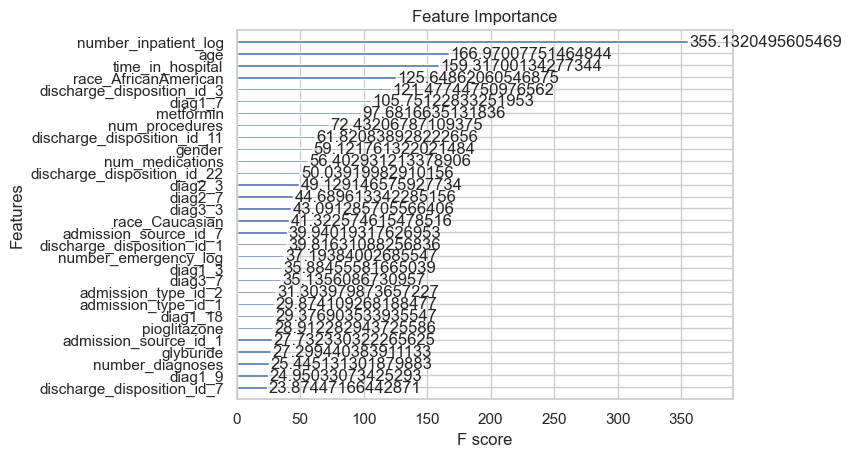

In [ ]:
from xgboost import plot_importance

# plot feature importance
xgb.plot_importance(best_model, importance_type='gain', max_num_features=30, title="Feature Importance")
plt.show()

cross validation


In [161]:
# Define search space
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import xgboost as xgb
from xgboost import XGBClassifier, DMatrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from skopt import BayesSearchCV
from skopt.space import Real, Integer
# XGBoost classifier base model

X_train, X_val, y_train, y_val = train_test_split(X_train_smenn, y_train_smenn, test_size=0.2, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_jobs=1,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='auc', 
    tree_method='auto',
    verbosity=0
)

In [162]:

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 20),
    'min_child_weight': Integer(1, 5),  # Corrected parameter name
    'reg_lambda': Real(1e-9, 100., 'log-uniform'),
    'reg_alpha': Real(1e-9, 100., 'log-uniform'),
    'gamma': Real(1e-9, 0.5, 'log-uniform'),
    'n_estimators': Integer(10, 5000)
}

In [163]:
# Create Bayesian CV for HP optimization
bayes_cv = BayesSearchCV(
    estimator=xgb_clf,
    search_spaces=search_spaces,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    n_iter=20,
    n_points=5,
    n_jobs=1,
    iid=False,
    refit=False,
    verbose=1,
    random_state=42
)

/opt/anaconda3/lib/python3.11/site-packages/skopt/searchcv.py:338: UserWarning: The `iid` parameter has been deprecated and will be ignored.
  warnings.warn(


In [164]:
# Run bayesian CV

%time bayes_cv.fit(X_train_smenn, y_train_smenn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 1h 14min 28s, sys: 1min 19s, total: 1h 15min 48s
Wall time: 1h 25min 33s


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster='gbtree',
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='auc', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      import...
                             'max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=5000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-09, high=100.0, prior='log-uniform', transform='normalize')},
              verbose=1)

In [ ]:
# Show best params
print('Best parameters:')
print(bayes_cv.best_params_)
print("Best score = %.3f after %d runs" % (bayes_cv.best_score_, bayes_cv.n_iter))

Best parameters:
OrderedDict([('gamma', 0.49999999999999994), ('learning_rate', 0.01), ('max_depth', 20), ('min_child_weight', 1), ('n_estimators', 2073), ('reg_alpha', 4.635052482289843e-05), ('reg_lambda', 0.8749478996478249)])
Best score = 0.981 after 20 runs


In [165]:
# Create XGBoost classifier with best params
xgb_clf_tuned = xgb.XGBClassifier(
        n_jobs = 5,
        objective = 'binary:logistic',
        eval_metric = 'auc', 
        tree_method = 'gpu_hist', 
        booster = 'gbtree',
        enable_categorical = True, 
        early_stopping_rounds = 5,
        **bayes_cv.best_params_
)

In [ ]:
# Fit to train data
xgb_clf_tuned.fit(X_train_smenn, y_train_smenn)
y_pred = xgb_clf_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

XGBoostError: [16:47:11] /Users/runner/work/xgboost/xgboost/src/gbm/../common/common.h:174: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000016add4428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016afa03f8 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 1276
  [bt] (2) 3   libxgboost.dylib                    0x000000016afbf54c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (3) 4   libxgboost.dylib                    0x000000016adf627c XGBoosterBoostedRounds + 100
  [bt] (4) 5   libffi.8.dylib                      0x000000010142c04c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000101429834 ffi_call_int + 1404
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x00000001015e4148 _ctypes_callproc + 752
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x00000001015de4ac PyCFuncPtr_call + 228
  [bt] (8) 9   python3.11                          0x0000000100bf99bc _PyEval_EvalFrameDefault + 192324

